## How to read the GW whitened signals

Before running the notebook, you need to import the zip file containing the whitened signals in your google drive or directly in the google colab.

In [ ]:
from google.colab import files
files.upload()

Saving Gravity_Spy_Glitches_whitened_1.zip to Gravity_Spy_Glitches_whitened_1.zip


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
!unzip /content/drive/MyDrive/Gravity_Spy_Glitches_whitened_1.zip

Archive:  /content/drive/MyDrive/Gravity_Spy_Glitches_whitened_1.zip
   creating: content/sample_data/Gravity_Spy/
  inflating: content/sample_data/Gravity_Spy/qiOJvCXifs_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/i8B9fJ76WV_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/0v1QV37R4c_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/tchbkApLJb_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/pQiELkUGV5_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/rgxBEMihUv_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/mVDeJtzwbZ_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/cuiN0cvLl3_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/WSakzjRJ2x_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/hLHeshYD1B_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/f2G4fHG3cC_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/sEyEv3Kcqp_whitened.h5  
  inflating: content/sample_data/Gravity_Spy/

Install gwpy

In [61]:
!pip install gwpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import useful packages

In [62]:
import os
import h5py as h5
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
from os import listdir
import numpy as np

Example of a single signal, print the attributes of the dataseries and plot it

In [ ]:
fout=h5.File('/content/content/sample_data/Gravity_Spy/1Uyq6bx1BZ_whitened.h5','r') 
type_of_glitch=list(fout.keys())[0]
print(type_of_glitch)

Whistle


<KeysViewHDF5 ['sample_rate', 't0']>
1136209636.77539
4096.0


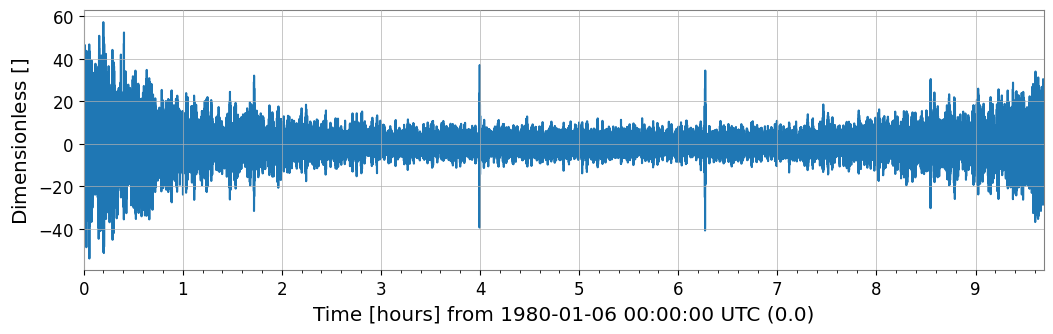

In [ ]:
dataset=fout[type_of_glitch]
print(dataset.attrs.keys())
print(dataset.attrs['t0'])
print(dataset.attrs['sample_rate'])
t = TimeSeries(dataset[()])
t.plot()
plt.show()

Construct a dataframe from the hdf5 timeseries files

In [66]:
name_data=[]
starting_times_data=[]
timeseries_data=[]
type_data=[]
path='/content/content/sample_data/Gravity_Spy/'
for file in listdir(path):
  fout=h5.File(path+file,'r') 
  type_of_glitch=list(fout.keys())[0]
  dataset=fout[type_of_glitch]
  t = TimeSeries(dataset[()])
  name_data.append(file.split('.')[0].split('_')[0])
  type_data.append(type_of_glitch)
  starting_times_data.append(dataset.attrs['t0'])
  timeseries_data.append(dataset[()])

In [67]:
import pandas as pd
 
# intialise data of lists.
data = {'ID':name_data,
        'Type_Of_Glitch':type_data,
        'Starting_Times':starting_times_data,
        'TimeSeries':timeseries_data}
# Create DataFrame
df = pd.DataFrame(data)

In [68]:
df

,ID,Type_Of_Glitch,Starting_Times,TimeSeries
0,kyZBoq0wnZ,Tomte,1.128922e+09,"[20.34856, -7.8462768, 10.252359, -8.336526, 8..."
1,OvdalGXczR,Scattered_Light,1.128518e+09,"[-3.1354256, -0.88920444, 0.9618341, -3.547946..."
2,beodcMb40C,Low_Frequency_Lines,1.134782e+09,"[-40.186012, 45.009277, -41.401344, 51.13907, ..."
3,zdtpSQtlCC,Light_Modulation,1.136407e+09,"[3.2114089, -3.4032662, -1.5395957, 3.0477731,..."
4,FS87tK16hu,Tomte,1.134268e+09,"[3.5967832, -3.4128404, 2.620749, -1.4296108, ..."
...,...,...,...,...
1090,yhZtzhQnFB,Power_Line,1.129635e+09,"[89.504005, -88.01169, 85.26129, -68.57926, 70..."
1091,75MM5GP4rI,Scattered_Light,1.134166e+09,"[-11.159942, 2.463848, -7.346102, 1.6156174, -..."
1092,DEnvzLQ0bp,Low_Frequency_Burst,1.134639e+09,"[-28.751307, 5.996373, -33.897484, 1.6185153, ..."
1093,ZA0qb8mGf0,Low_Frequency_Lines,1.130749e+09,"[-5.5890856, -0.22907573, -4.738017, 3.0249434..."


Example of the timeseries of a signal

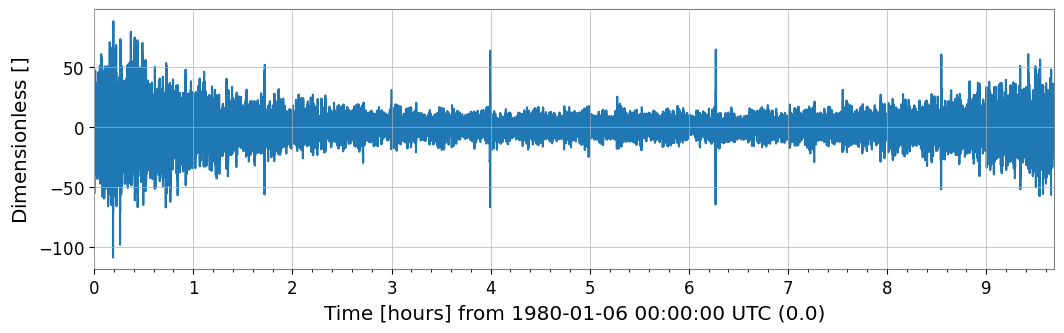

In [72]:
t=TimeSeries(df['TimeSeries'][32])
t.plot()
plt.show()

Plot the Q-transform of the signal

In [ ]:
def qplot(data, t_center, t_delta):
     
    plot=data.crop(t_center-t_delta, t_center+t_delta).plot(figsize=[2, 2])
    plt.axis('off')
    ax = plot.gca()
    ax.grid(False)
    
    return plot

Start time: 1127995349.39062(s)
Stop time : 1127995357.9020946(s)
Duration: 8.511474609375(s)
Scratchy
ILbpajWNkc_whitened.h5


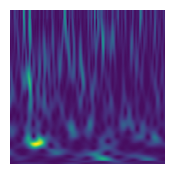

Start time: 1129742246.29688(s)
Stop time : 1129742254.8083546(s)
Duration: 8.511474609375(s)
Power_Line
BBq3QdsMD0_whitened.h5


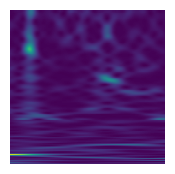

Start time: 1136955048.64062(s)
Stop time : 1136955057.1520946(s)
Duration: 8.511474609375(s)
No_Glitch
SDKAwEPWAi_whitened.h5


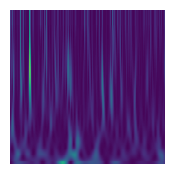

Start time: 1134477067.9375(s)
Stop time : 1134477076.4489746(s)
Duration: 8.511474609375(s)
Scattered_Light
KEA6F9kEW3_whitened.h5


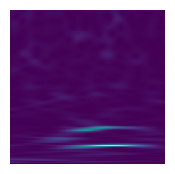

Start time: 1135351587.5625(s)
Stop time : 1135351596.0739746(s)
Duration: 8.511474609375(s)
Scattered_Light
mgE2NeJ24Z_whitened.h5


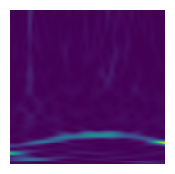

Start time: 1134331759.91895(s)
Stop time : 1134331768.4304247(s)
Duration: 8.511474609375(s)
Koi_Fish
2MiqBqkHEl_whitened.h5


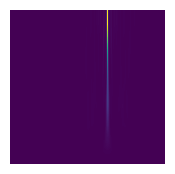

Start time: 1136478742.38281(s)
Stop time : 1136478750.8942847(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
f2G4fHG3cC_whitened.h5


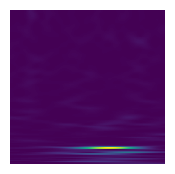

Start time: 1130482335.8125(s)
Stop time : 1130482344.3239746(s)
Duration: 8.511474609375(s)
Scattered_Light
uYH3v5lhLt_whitened.h5


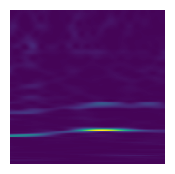

Start time: 1129354796.43603(s)
Stop time : 1129354804.9475045(s)
Duration: 8.511474609375(s)
Whistle
sfou6nqdty_whitened.h5


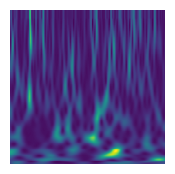

Start time: 1132940447.60547(s)
Stop time : 1132940456.1169446(s)
Duration: 8.511474609375(s)
Tomte
bjGE7Mug1R_whitened.h5


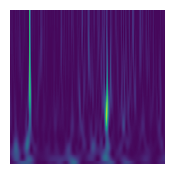

Start time: 1129075267.56934(s)
Stop time : 1129075276.0808146(s)
Duration: 8.511474609375(s)
Blip
vPHbnVojbS_whitened.h5


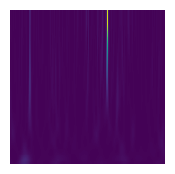

Start time: 1130518672.12891(s)
Stop time : 1130518680.6403847(s)
Duration: 8.511474609375(s)
Tomte
2FxSEGMVyM_whitened.h5


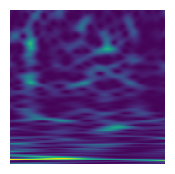

Start time: 1134544738.42969(s)
Stop time : 1134544746.9411645(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
ZGRbKAaj5j_whitened.h5


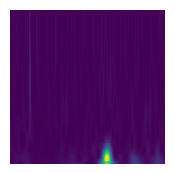

Start time: 1131949939.53369(s)
Stop time : 1131949948.0451646(s)
Duration: 8.511474609375(s)
Blip
vSCZer8U3p_whitened.h5


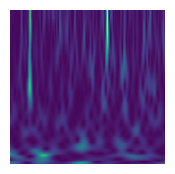

Start time: 1134478339.875(s)
Stop time : 1134478348.3864746(s)
Duration: 8.511474609375(s)
Scattered_Light
F35eiJmzAg_whitened.h5


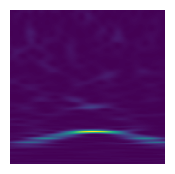

Start time: 1127516088.33984(s)
Stop time : 1127516096.8513145(s)
Duration: 8.511474609375(s)
Tomte
tAePqawmuJ_whitened.h5


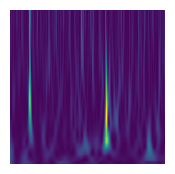

Start time: 1131168631.78125(s)
Stop time : 1131168640.2927246(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
61mbiRWCej_whitened.h5


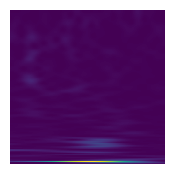

Start time: 1129835744.8457(s)
Stop time : 1129835753.3571746(s)
Duration: 8.511474609375(s)
Scratchy
t2nKmTflU1_whitened.h5


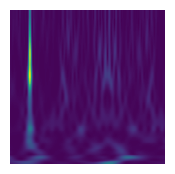

Start time: 1132644128.875(s)
Stop time : 1132644137.3864746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
Df52cCVWQE_whitened.h5


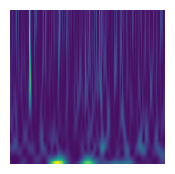

Start time: 1128248234.86352(s)
Stop time : 1128248243.3749945(s)
Duration: 8.511474609375(s)
Blip
vUkyCQCVgl_whitened.h5


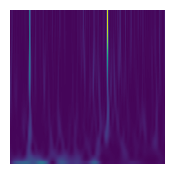

Start time: 1132649838.92773(s)
Stop time : 1132649847.4392047(s)
Duration: 8.511474609375(s)
Whistle
EVwqC7BNFr_whitened.h5


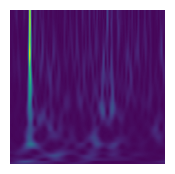

Start time: 1129357421.90918(s)
Stop time : 1129357430.4206545(s)
Duration: 8.511474609375(s)
Whistle
PVTCPJC8jB_whitened.h5


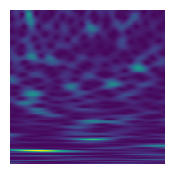

Start time: 1130154410.10742(s)
Stop time : 1130154418.6188946(s)
Duration: 8.511474609375(s)
Scratchy
B744zbTvTs_whitened.h5


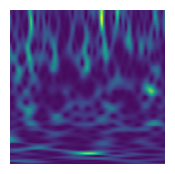

Start time: 1135288961.8125(s)
Stop time : 1135288970.3239746(s)
Duration: 8.511474609375(s)
Scattered_Light
len2fHlT2I_whitened.h5


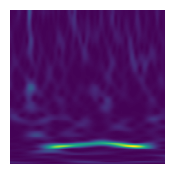

Start time: 1134630632.9375(s)
Stop time : 1134630641.4489746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
4H6BWQwPAl_whitened.h5


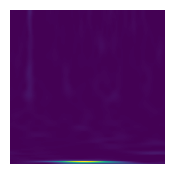

Start time: 1126959824.23438(s)
Stop time : 1126959832.7458546(s)
Duration: 8.511474609375(s)
Power_Line
RMZhFd7sGz_whitened.h5


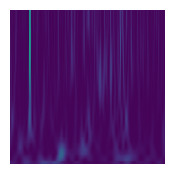

Start time: 1135358661.125(s)
Stop time : 1135358669.6364746(s)
Duration: 8.511474609375(s)
Scattered_Light
WtEvhBL0BT_whitened.h5


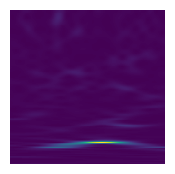

Start time: 1136209636.77539(s)
Stop time : 1136209645.2868645(s)
Duration: 8.511474609375(s)
Whistle
1Uyq6bx1BZ_whitened.h5


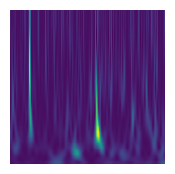

Start time: 1132937496.92432(s)
Stop time : 1132937505.4357946(s)
Duration: 8.511474609375(s)
Blip
u8dASpx2k1_whitened.h5


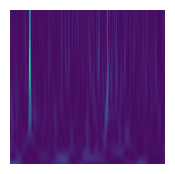

Start time: 1133692354.5625(s)
Stop time : 1133692363.0739746(s)
Duration: 8.511474609375(s)
Scattered_Light
OszfPpSpvv_whitened.h5


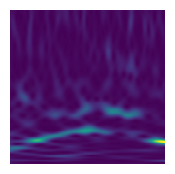

Start time: 1135205206.37598(s)
Stop time : 1135205214.8874545(s)
Duration: 8.511474609375(s)
Blip
uXHoy3fm2A_whitened.h5


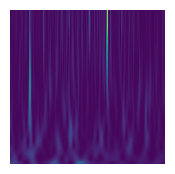

Start time: 1132583269.83594(s)
Stop time : 1132583278.3474145(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
KiLC9sEUoe_whitened.h5


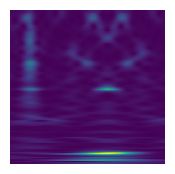

Start time: 1137095090.5625(s)
Stop time : 1137095099.0739746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
tjD9CIIHTf_whitened.h5


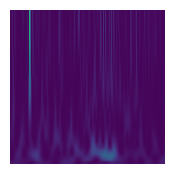

Start time: 1129221708.8125(s)
Stop time : 1129221717.3239746(s)
Duration: 8.511474609375(s)
Scattered_Light
3sd26tGFDA_whitened.h5


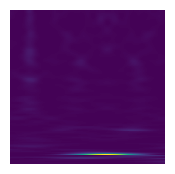

Start time: 1130800447.79688(s)
Stop time : 1130800456.3083546(s)
Duration: 8.511474609375(s)
Power_Line
5QMzZPBSwp_whitened.h5


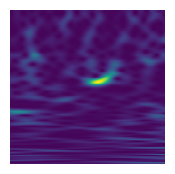

Start time: 1136380909.91016(s)
Stop time : 1136380918.4216347(s)
Duration: 8.511474609375(s)
Whistle
hDKn8tIhsb_whitened.h5


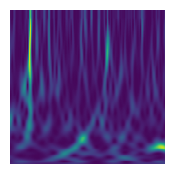

Start time: 1135431585.02539(s)
Stop time : 1135431593.5368645(s)
Duration: 8.511474609375(s)
Scratchy
tciU4L7Ax8_whitened.h5


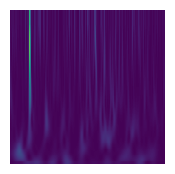

Start time: 1132970325.76855(s)
Stop time : 1132970334.2800245(s)
Duration: 8.511474609375(s)
Repeating_Blips
7HE88XV10G_whitened.h5


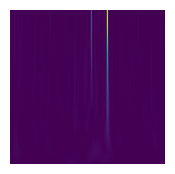

Start time: 1136401229.25(s)
Stop time : 1136401237.7614746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
JkqtKvW1yC_whitened.h5


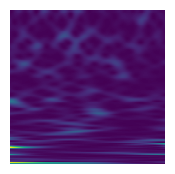

Start time: 1136589805.75(s)
Stop time : 1136589814.2614746(s)
Duration: 8.511474609375(s)
No_Glitch
8McmLiUO6Y_whitened.h5


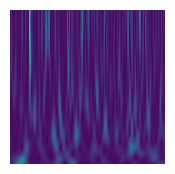

Start time: 1136404063.82812(s)
Stop time : 1136404072.3395946(s)
Duration: 8.511474609375(s)
Light_Modulation
xClUMdOxeM_whitened.h5


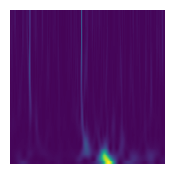

Start time: 1132634875.65625(s)
Stop time : 1132634884.1677246(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
i3DEmNlkYn_whitened.h5


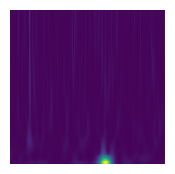

Start time: 1129980357.53125(s)
Stop time : 1129980366.0427246(s)
Duration: 8.511474609375(s)
No_Glitch
DFHdtPgGkQ_whitened.h5


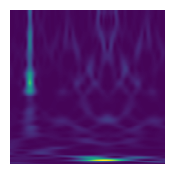

Start time: 1134167241.46875(s)
Stop time : 1134167249.9802246(s)
Duration: 8.511474609375(s)
Scratchy
ERY017yE3Z_whitened.h5


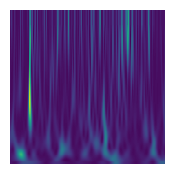

Start time: 1136623688.375(s)
Stop time : 1136623696.8864746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
8ISicZk0GB_whitened.h5


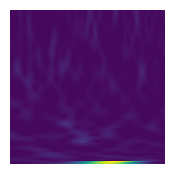

Start time: 1129537632.70312(s)
Stop time : 1129537641.2145946(s)
Duration: 8.511474609375(s)
Power_Line
tCUTdzBiX3_whitened.h5


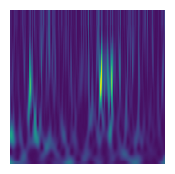

Start time: 1130197498.26562(s)
Stop time : 1130197506.7770946(s)
Duration: 8.511474609375(s)
Power_Line
t2jYWExWp9_whitened.h5


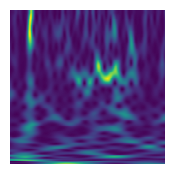

Start time: 1134870734.54688(s)
Stop time : 1134870743.0583546(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
vPXifQkpbu_whitened.h5


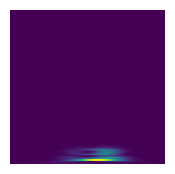

Start time: 1135942248.59375(s)
Stop time : 1135942257.1052246(s)
Duration: 8.511474609375(s)
Scattered_Light
7fQlXR2lUr_whitened.h5


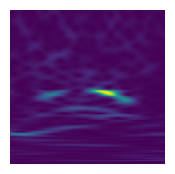

Start time: 1136366775.92578(s)
Stop time : 1136366784.4372547(s)
Duration: 8.511474609375(s)
Whistle
Sz7LDjLsrX_whitened.h5


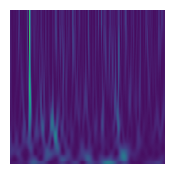

Start time: 1134494283.3125(s)
Stop time : 1134494291.8239746(s)
Duration: 8.511474609375(s)
Scattered_Light
r6910xomwp_whitened.h5


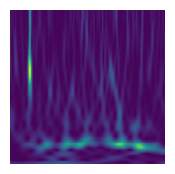

Start time: 1130520392.25879(s)
Stop time : 1130520400.7702646(s)
Duration: 8.511474609375(s)
Scratchy
kV9O8jo69u_whitened.h5


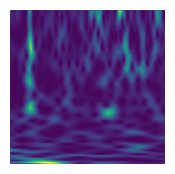

Start time: 1134499556.5625(s)
Stop time : 1134499565.0739746(s)
Duration: 8.511474609375(s)
Scattered_Light
SJNCZtrCfv_whitened.h5


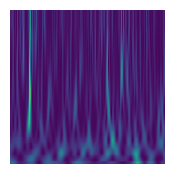

Start time: 1132571523.80859(s)
Stop time : 1132571532.3200645(s)
Duration: 8.511474609375(s)
Tomte
veho8NwJ89_whitened.h5


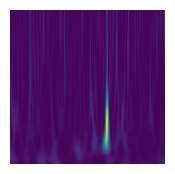

Start time: 1132034190.125(s)
Stop time : 1132034198.6364746(s)
Duration: 8.511474609375(s)
Scattered_Light
bz2CXKUWSK_whitened.h5


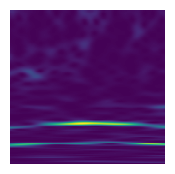

Start time: 1134925497.375(s)
Stop time : 1134925505.8864746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
cRMyGVCf4P_whitened.h5


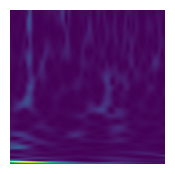

Start time: 1135870594.25(s)
Stop time : 1135870602.7614746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
jrMUc08dCq_whitened.h5


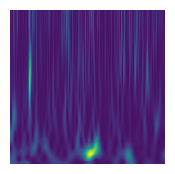

Start time: 1135556221.00781(s)
Stop time : 1135556229.5192847(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
cCcpWSbfKv_whitened.h5


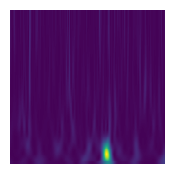

Start time: 1134921186.875(s)
Stop time : 1134921195.3864746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
puPmmsP0YL_whitened.h5


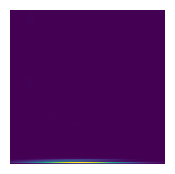

Start time: 1137047481.60938(s)
Stop time : 1137047490.1208546(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
tchbkApLJb_whitened.h5


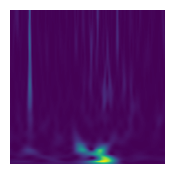

Start time: 1135746494.09375(s)
Stop time : 1135746502.6052246(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
ZuZhLLBNKP_whitened.h5


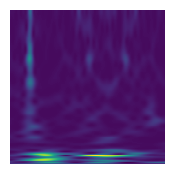

Start time: 1135503974.0625(s)
Stop time : 1135503982.5739746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
reE0CISEqn_whitened.h5


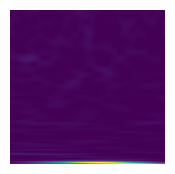

Start time: 1136271898.94141(s)
Stop time : 1136271907.4528847(s)
Duration: 8.511474609375(s)
Whistle
uOgvU9AyJW_whitened.h5


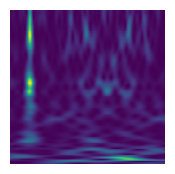

Start time: 1135119887.5625(s)
Stop time : 1135119896.0739746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
uEE2OYyvyt_whitened.h5


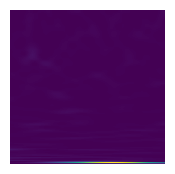

Start time: 1135767589.20312(s)
Stop time : 1135767597.7145946(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
Rww6HkwsFU_whitened.h5


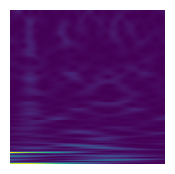

Start time: 1133451350.1875(s)
Stop time : 1133451358.6989746(s)
Duration: 8.511474609375(s)
Power_Line
Doc98dGPkJ_whitened.h5


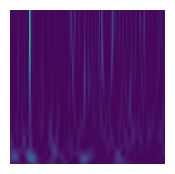

Start time: 1129749062.9668(s)
Stop time : 1129749071.4782746(s)
Duration: 8.511474609375(s)
Scratchy
075BYxaRNt_whitened.h5


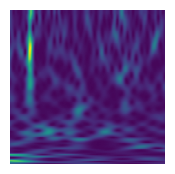

Start time: 1134492193.40625(s)
Stop time : 1134492201.9177246(s)
Duration: 8.511474609375(s)
Scattered_Light
o0nANvdhaE_whitened.h5


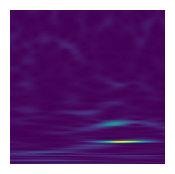

Start time: 1135888952.1875(s)
Stop time : 1135888960.6989746(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
lfWaxMqiaw_whitened.h5


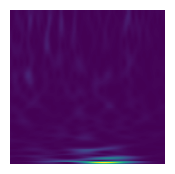

Start time: 1134929506.40625(s)
Stop time : 1134929514.9177246(s)
Duration: 8.511474609375(s)
Scattered_Light
sSFprEmMOm_whitened.h5


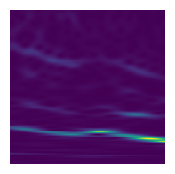

Start time: 1131934106.96875(s)
Stop time : 1131934115.4802246(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
xJNfNmdzZY_whitened.h5


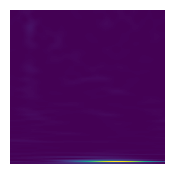

Start time: 1130680206.72266(s)
Stop time : 1130680215.2341347(s)
Duration: 8.511474609375(s)
None_of_the_Above
Ehvz6zaqjR_whitened.h5


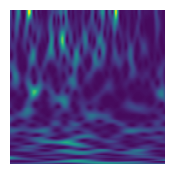

Start time: 1126721962.17188(s)
Stop time : 1126721970.6833546(s)
Duration: 8.511474609375(s)
Power_Line
KSEjqPVLjH_whitened.h5


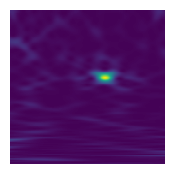

Start time: 1132799282.35132(s)
Stop time : 1132799290.8627946(s)
Duration: 8.511474609375(s)
Blip
sZSjLZFW8i_whitened.h5


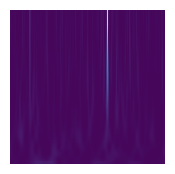

Start time: 1136111956.17188(s)
Stop time : 1136111964.6833546(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
nzCiuKWiA6_whitened.h5


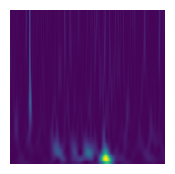

Start time: 1136386526.62695(s)
Stop time : 1136386535.1384246(s)
Duration: 8.511474609375(s)
Scratchy
0z27Jglo70_whitened.h5


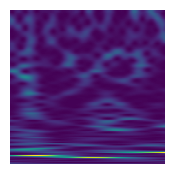

Start time: 1129366827.86523(s)
Stop time : 1129366836.3767047(s)
Duration: 8.511474609375(s)
Whistle
IR0TwCz0JI_whitened.h5


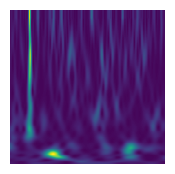

Start time: 1135391725.6875(s)
Stop time : 1135391734.1989746(s)
Duration: 8.511474609375(s)
No_Glitch
y69hdVQkOT_whitened.h5


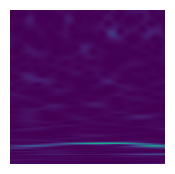

Start time: 1130810022.14014(s)
Stop time : 1130810030.6516147(s)
Duration: 8.511474609375(s)
Whistle
AHc247NzO6_whitened.h5


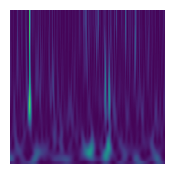

Start time: 1135338403.78125(s)
Stop time : 1135338412.2927246(s)
Duration: 8.511474609375(s)
Scattered_Light
nO0E4nuss0_whitened.h5


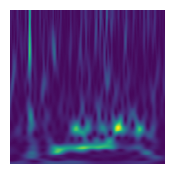

Start time: 1135555291.75(s)
Stop time : 1135555300.2614746(s)
Duration: 8.511474609375(s)
No_Glitch
DaU5LQcHtr_whitened.h5


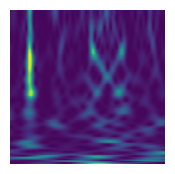

Start time: 1134488474.65625(s)
Stop time : 1134488483.1677246(s)
Duration: 8.511474609375(s)
Scattered_Light
c0DE8rheX1_whitened.h5


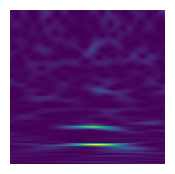

Start time: 1132630460.30566(s)
Stop time : 1132630468.8171346(s)
Duration: 8.511474609375(s)
Blip
rgxBEMihUv_whitened.h5


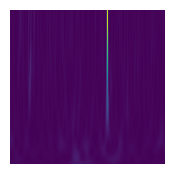

Start time: 1137012700.375(s)
Stop time : 1137012708.8864746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
PYtaLVCDlD_whitened.h5


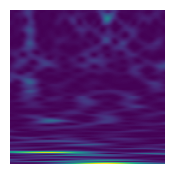

Start time: 1126667654.26562(s)
Stop time : 1126667662.7770946(s)
Duration: 8.511474609375(s)
Power_Line
f7JcqJhIB1_whitened.h5


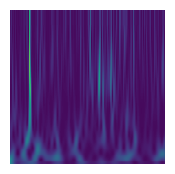

Start time: 1135391684.4375(s)
Stop time : 1135391692.9489746(s)
Duration: 8.511474609375(s)
Scattered_Light
7JebfwVcgy_whitened.h5


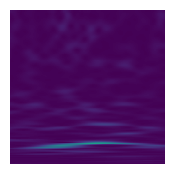

Start time: 1136036444.9375(s)
Stop time : 1136036453.4489746(s)
Duration: 8.511474609375(s)
Scattered_Light
1a0JILAF6A_whitened.h5


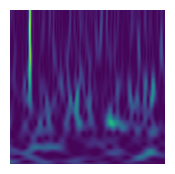

Start time: 1135038631.6875(s)
Stop time : 1135038640.1989746(s)
Duration: 8.511474609375(s)
Scattered_Light
U815b2VKty_whitened.h5


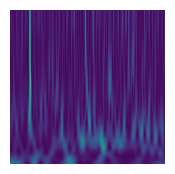

Start time: 1136207855.17969(s)
Stop time : 1136207863.6911645(s)
Duration: 8.511474609375(s)
Whistle
Ir4cnSf0GN_whitened.h5


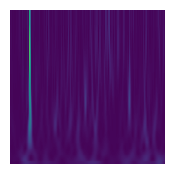

Start time: 1134513123.71875(s)
Stop time : 1134513132.2302246(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
SEySoPnr0Y_whitened.h5


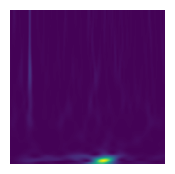

Start time: 1136214698.49805(s)
Stop time : 1136214707.0095246(s)
Duration: 8.511474609375(s)
Whistle
Ew2FV4Q768_whitened.h5


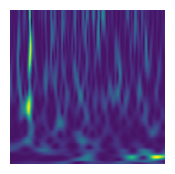

Start time: 1130955838.4873(s)
Stop time : 1130955846.9987745(s)
Duration: 8.511474609375(s)
Blip
rFAvyOJilQ_whitened.h5


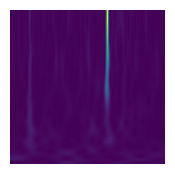

Start time: 1136547230.22656(s)
Stop time : 1136547238.7380347(s)
Duration: 8.511474609375(s)
Whistle
xHswMS4pdR_whitened.h5


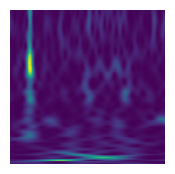

Start time: 1133885962.8125(s)
Stop time : 1133885971.3239746(s)
Duration: 8.511474609375(s)
Low_Frequency_Lines
wNaaKSpsCz_whitened.h5


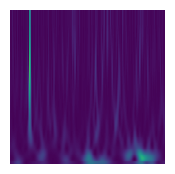

Start time: 1128813086.20312(s)
Stop time : 1128813094.7145946(s)
Duration: 8.511474609375(s)
Low_Frequency_Burst
5np02f4hYm_whitened.h5


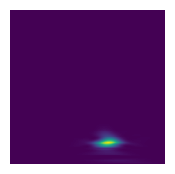

Start time: 1126922998.20312(s)
Stop time : 1126923006.7145946(s)
Duration: 8.511474609375(s)
Power_Line
fYsBSWkRQP_whitened.h5


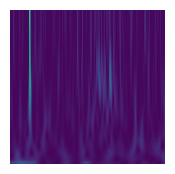

Start time: 1132645181.68945(s)
Stop time : 1132645190.2009246(s)
Duration: 8.511474609375(s)
Whistle
UR1Q68tHnO_whitened.h5


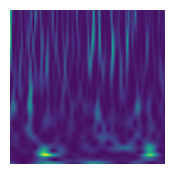

Start time: 1136427993.0625(s)
Stop time : 1136428001.5739746(s)
Duration: 8.511474609375(s)
Scattered_Light
lIdoYoShGz_whitened.h5


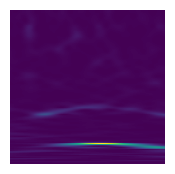

Start time: 1132917747.74609(s)
Stop time : 1132917756.2575645(s)
Duration: 8.511474609375(s)
Tomte
DP4yOZaJcC_whitened.h5


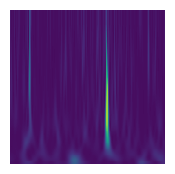

Start time: 1128837448.4707(s)
Stop time : 1128837456.9821746(s)
Duration: 8.511474609375(s)
Whistle
P5RFSNuJch_whitened.h5


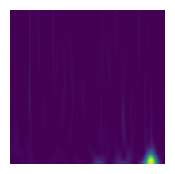

Start time: 1135969744.3125(s)
Stop time : 1135969752.8239746(s)
Duration: 8.511474609375(s)
Scattered_Light
IxEdITAtRq_whitened.h5


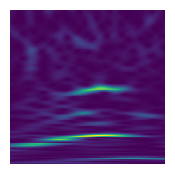

In [ ]:
#fout=h5.File(path+outfile,'r')
#dataset=fout['Low_Frequency_Lines']
#t = TimeSeries(dataset[()])
outdir='/content/content/sample_data/Gravity_Spy/'
i=0
t_last=100

for outfile in os.listdir(outdir):
  fout=h5.File(outdir+outfile,'r')
  type_of_glitch=list(fout.keys())[0]
  dataset=fout[type_of_glitch]
  t = TimeSeries(dataset[()])
  t_delta=1.0
  # get signal time interval
  t_start=dataset.attrs['t0']
  dt=1.0 / dataset.attrs['sample_rate']
  t.t0 = t_start
  t.dt = dt
  t_stop=t.times[-1].value
  print('Start time: '+str(t_start)+'(s)')
  print('Stop time : '+str(t_stop)+'(s)')
  print('Duration: '+str(t_stop-t_start)+'(s)')
       
  # q-transform around center and below 100 Hz
  t_center=(t_stop-t_start)/2+t_start
  hq = t.q_transform(outseg=(t_center-t_delta,t_center+t_delta),frange=(10, 100))
           
  plot=qplot(hq,t_center,t_delta)
           
  fout.close()
  print(type_of_glitch)
  print(outfile)
  plt.show()
  if i==t_last:
    break
  i+=1

Start time: 1134216192.93164(s)
Stop time : 1134216193.11914(s)
Duration: 0.1875(s)
Whistle
r6910xomwp_whitened.h5


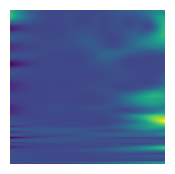

In [ ]:
fout=h5.File('/content/content/sample_data/Gravity_Spy/zmIdpucyOG_whitened.h5','r')
type_of_glitch=list(fout.keys())[0] 
dataset=fout[type_of_glitch]
t = TimeSeries(dataset[()])
t_delta=0.2
# get signal time interval
t_start=dataset.attrs['t0']
dt=1.0 / dataset.attrs['sample_rate']
t.t0 = t_start
t.dt = dt
t_stop=t_start+df['duration'][0]
print('Start time: '+str(t_start)+'(s)')
print('Stop time : '+str(t_stop)+'(s)')
print('Duration: '+str(t_stop-t_start)+'(s)')
       
# q-transform around center and below 100 Hz
t_center=(t_stop-t_start)/2+t_start
hq = t.q_transform(outseg=(t_center-t_delta,t_center+t_delta),frange=(10, 100))
         
plot=qplot(hq,t_center,t_delta)
           
fout.close()
print(type_of_glitch)
print(outfile)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
#read the dataframe
df=pd.read_csv('trainingset_v1d1_metadata.csv')
df

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,search,process_id,event_id,...,chisq_dof,param_one_name,param_one_value,gravityspy_id,label,sample_type,url1,url2,url3,url4
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,Omicron,0,21,...,0,phase,-2.72902,zmIdpucyOG,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,Omicron,0,107,...,0,phase,1.10682,zWFRqqDxwv,Whistle,test,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,Omicron,0,218,...,0,phase,-0.83099,zKCTakFVcf,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,Omicron,0,88,...,0,phase,0.76242,z14BdoiFZS,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,Omicron,0,16,...,0,phase,-0.31161,yyjqLCtAmO,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,1.127688e+09,L1,1127688297,710937023,1127688292,0,9.00391,Omicron,0,182,...,0,phase,-2.48491,K4lUik19zL,Extremely_Loud,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
7962,1.128422e+09,L1,1128421736,324218034,1128421736,304687023,0.03906,Omicron,0,396,...,0,phase,1.32651,EkRSkrpPet,Helix,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
7963,1.164774e+09,H1,1164773536,433593034,1164773535,911376953,1.16675,OMICRON,0,1817,...,0,phase,2.72929,xyLhvRKzzX,1080Lines,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
7964,1.163790e+09,L1,1163789867,496093034,1163789867,476562023,0.10156,OMICRON,0,501,...,0,phase,0.66486,lshKvhcRcT,Violin_Mode,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...


Start time: 1129359781.55859(s)
Stop time : 1129359801.5583458(s)
Duration: 19.999755859375(s)



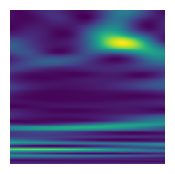

In [ ]:
fs=4096
dt=1.0 /fs
NFFT = int(4*fs)
gps=df['event_time'][1]
#gps_end=gps_start+df['duration'][1]
dataset = TimeSeries.fetch_open_data(df['ifo'][1], gps-10, gps+10)
#dataset=fout[type_of_glitch]
t = TimeSeries(dataset[()])
t_delta=0.1
# get signal time interval
t_start=gps
t.t0 = t_start
t.dt = dt
t_stop=t.times[-1].value
print('Start time: '+str(t_start)+'(s)')
print('Stop time : '+str(t_stop)+'(s)')
print('Duration: '+str(t_stop-t_start)+'(s)')
print()
       
# q-transform around center and below 100 Hz
t_center=(t_stop-t_start)/2+t_start
hq = t.q_transform(outseg=(t_center-t_delta,t_center+t_delta),frange=(10, 100))
         
plot=qplot(hq,t_center,t_delta)
plt.show()

In [ ]:
df['label'][1]

'Whistle'

## How to read the whitened Virgo Glitches

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
!unzip /content/drive/MyDrive/O3a_scatt_light_strain_whitened.zip

Archive:  /content/drive/MyDrive/O3a_scatt_light_strain_whitened.zip
   creating: content/O3a_scatt_light_strain_whitened_2/
  inflating: content/O3a_scatt_light_strain_whitened_2/yvz43iKqc3_whitened.h5  
  inflating: content/O3a_scatt_light_strain_whitened_2/U5IdkROW5j_whitened.h5  
  inflating: content/O3a_scatt_light_strain_whitened_2/k2oTJoNCW6_whitened.h5  
  inflating: content/O3a_scatt_light_strain_whitened_2/g8au0VKj3C_whitened.h5  
  inflating: content/O3a_scatt_light_strain_whitened_2/yZ2qNk583j_whitened.h5  
  inflating: content/O3a_scatt_light_strain_whitened_2/S9eu7YbOZ9_whitened.h5  
  inflating: content/O3a_scatt_light_strain_whitened_2/hOnba6rVqf_whitened.h5  
  inflating: content/O3a_scatt_light_strain_whitened_2/TMYamsqsi4_whitened.h5  
  inflating: content/O3a_scatt_light_strain_whitened_2/FPhHXwZDJH_whitened.h5  
  inflating: content/O3a_scatt_light_strain_whitened_2/DFXN9UrnzL_whitened.h5  
  inflating: content/O3a_scatt_light_strain_whitened_2/6FiRe0Kdll_whitened.

In [ ]:
!pip install gwpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.4 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=101661 sha256=289490b0ac4e9b185d313d1ea4e1a4e949da68e0c2c7d3dd0331c624bbba84f5
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
from os import listdir
import numpy as np

In [75]:
name_data_Virgo=[]
starting_times_data_Virgo=[]
timeseries_data_Virgo=[]
type_data_Virgo=[]
path='/content/content/O3a_scatt_light_strain_whitened_2/'
for file in listdir(path):
  fout=h5.File(path+file,'r') 
  type_of_glitch=list(fout.keys())[0]
  dataset=fout[type_of_glitch]
  t = TimeSeries(dataset[()])
  name_data_Virgo.append(file.split('.')[0].split('_')[0])
  type_data_Virgo.append(type_of_glitch)
  starting_times_data_Virgo.append(dataset.attrs['t0'])
  timeseries_data_Virgo.append(dataset[()])

In [76]:
import pandas as pd
 
# intialise data of lists.
data_Virgo = {'ID':name_data_Virgo,
        'Type_Of_Glitch':type_data_Virgo,
        'Starting_Times':starting_times_data_Virgo,
        'TimeSeries':timeseries_data_Virgo}
# Create DataFrame
df_Virgo = pd.DataFrame(data_Virgo)

In [77]:
df_Virgo

,ID,Type_Of_Glitch,Starting_Times,TimeSeries
0,Uc7MGREltH,scattered_light,1.241385e+09,"[5.9776464, 4.81827, 3.628287, 2.8263104, 4.82..."
1,1Yy3AxSi6g,scattered_light,1.241385e+09,"[-4.161692, -2.8084307, -1.843007, -0.91066056..."
2,LxJRrqrF2r,scattered_light,1.241385e+09,"[0.05101235, 1.8279028, 0.20721734, 1.9136744,..."
3,TpIZCtw7DH,scattered_light,1.241385e+09,"[-5.5925436, -5.425176, -5.722309, -7.060851, ..."
4,BQ5HF1YA83,scattered_light,1.241385e+09,"[-5.050224, -5.8438263, -4.88928, -9.0640335, ..."
...,...,...,...,...
850,04YwO3qyVL,scattered_light,1.241385e+09,"[-4.1065593, -0.50666255, -0.16631469, -2.9568..."
851,Vk4TAllfli,scattered_light,1.241385e+09,"[-0.13780269, 1.5846854, 0.11809873, -1.143281..."
852,BA7aoxlwOA,scattered_light,1.241385e+09,"[-0.54468054, 4.8758855, 5.3688335, 3.1235688,..."
853,B2j0yonFDa,scattered_light,1.241385e+09,"[-0.57916474, 0.5001321, 1.1949768, -0.8928445..."
